In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [125]:
def create_graph():
        
    # Create an empty graph
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from([1, 2, 3, 4, 5, 6])

    # Add edges
    G.add_edges_from([(1, 3), (1, 2), (2, 3), (2, 4), (2, 6), (6, 5), (4, 5)])
    return G


In [126]:
def sum_neighbor_colors(G, colors_codes, hash_colors):
    neighbor_codes = []
    for node in G.nodes:
        neighbor_colors = [colors_codes[node-1]] 
        for neighbor in G.neighbors(node):
            neighbor_colors.append(colors_codes[neighbor-1])
        color_hash = ''.join(str(i) for i in sorted(neighbor_colors))
        neighbor_codes.append(color_hash)
        if color_hash not in hash_colors:
            hash_colors[color_hash] = len(hash_colors)+1

    return neighbor_codes

In [127]:
def draw_graph(G, colors, seed=42):

    # Draw the graph with a fixed layout
    pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout

    nx.draw_networkx_nodes(G, pos, node_color=[colors[node-1] for node in G.nodes], node_size=1200)

    # Draw the edges of the graph G
    nx.draw_networkx_edges(G, pos)

    plt.show()


In [131]:
import random

def generate_unique_colors(num_colors):
    colors = []
    
    for _ in range(num_colors):
        # Generate random RGB values
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
        
        # Check the luminance value to ensure high contrast
        luminance = (0.299 * r + 0.587 * g + 0.114 * b) / 255
        
        # Adjust the luminance threshold as per your preference
        luminance_threshold = 0.5
        
        # If the luminance value is within the threshold range, adjust the colors
        if luminance > luminance_threshold:
            r = random.randint(0, 127)
            g = random.randint(0, 127)
            b = random.randint(0, 127)
        else:
            r = random.randint(128, 255)
            g = random.randint(128, 255)
            b = random.randint(128, 255)
        
        color = [r/255.0, g/255.0, b/255.0]
        
        colors.append(color)
    
    return colors

colors = np.array(generate_unique_colors(100))

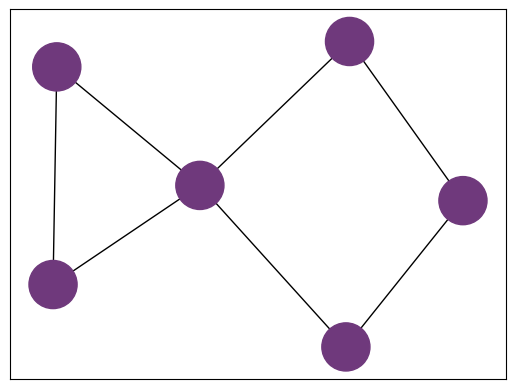

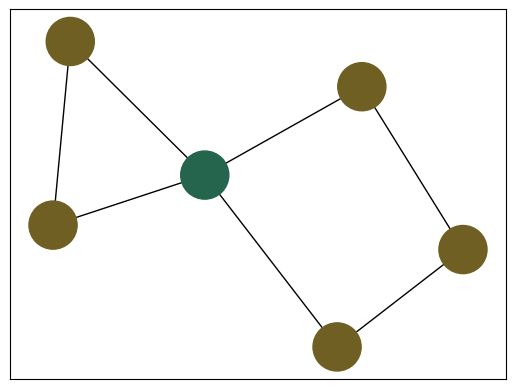

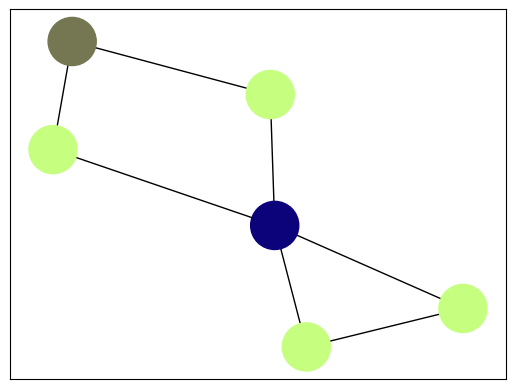

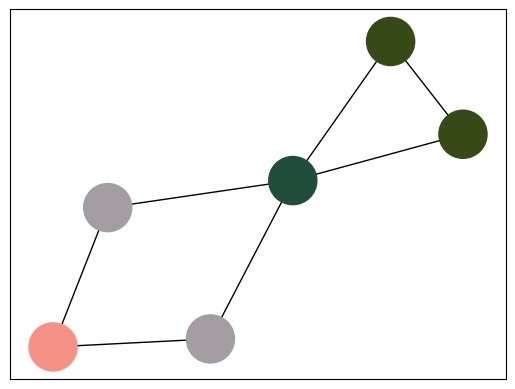

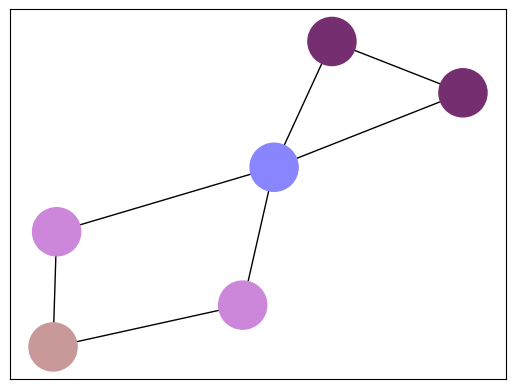

In [132]:
color_codes = np.array([0 for i in range(6)])
hash_colors = {}
graph = create_graph()
for i in range(5):
    draw_graph(graph, colors[color_codes], i)
    color_codes = sum_neighbor_colors(graph, color_codes, hash_colors)
    color_codes = np.array([hash_colors[cc] for cc in color_codes])